In [1]:
using DelimitedFiles
using Plots
pyplot()
# using NaNMath
using Statistics

In [2]:
nanmean(x) = mean(filter(!isnan, x))

nanmean (generic function with 1 method)

In [3]:
file = readdlm("exoplanet-data.txt");
t = file[:, 1];
light = file[:, 2];

In [4]:
#replacing NaNs with mean of 4 nearest points
for i in findall(isnan.(light))
    light[i] = nanmean(light[i-2:i+2])
end

# sanity check
print(sum(isnan.(light)))

0

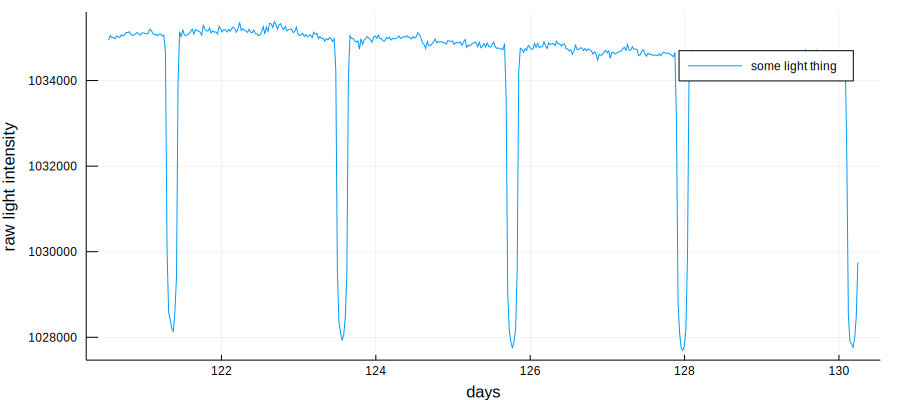

In [5]:
gr(size = (900, 400))
plot(t, light, label = "some light thing")

xlabel!("days")
ylabel!("raw light intensity")
# xlims!((125, 125.2))

# a) estimating orbital period of the planet

In [6]:
function flatsmooth(light, t, degree)
    lower = Int((degree-1)/2)
    upper = Int((degree+1)/2)
#     counter = 0
    l = length(light)
    lightsmoothed = zeros(l)
    
    for i in upper:length(light)-lower
        lightsmoothed[i] = mean(light[i-lower:i+lower])
    end
    
    for j in findall(lightsmoothed .== 0)
        lightsmoothed[j] = light[j]
    end
#     while counter < lower
#         t = deleteat!(deleteat!(t, length(t)), 1)
#         counter += 1
#     end
    return lightsmoothed, t
end

flatsmooth (generic function with 1 method)

In [7]:
plot(tsmooth3, lightsmooth3)

UndefVarError: UndefVarError: tsmooth3 not defined

In [8]:
a, b = flatsmooth(light, t, 3)

([1.03494e6, 1.035e6, 1.03502e6, 1.035e6, 1.03501e6, 1.03501e6, 1.03502e6, 1.03504e6, 1.03504e6, 1.03506e6  …  1.03448e6, 1.03376e6, 1.03176e6, 1.02956e6, 1.02808e6, 1.02784e6, 1.02787e6, 1.02808e6, 1.02874e6, 1.02975e6], [120.539, 120.559, 120.58, 120.6, 120.621, 120.641, 120.661, 120.682, 120.702, 120.723  …  130.061, 130.082, 130.102, 130.123, 130.143, 130.163, 130.184, 130.204, 130.225, 130.245])

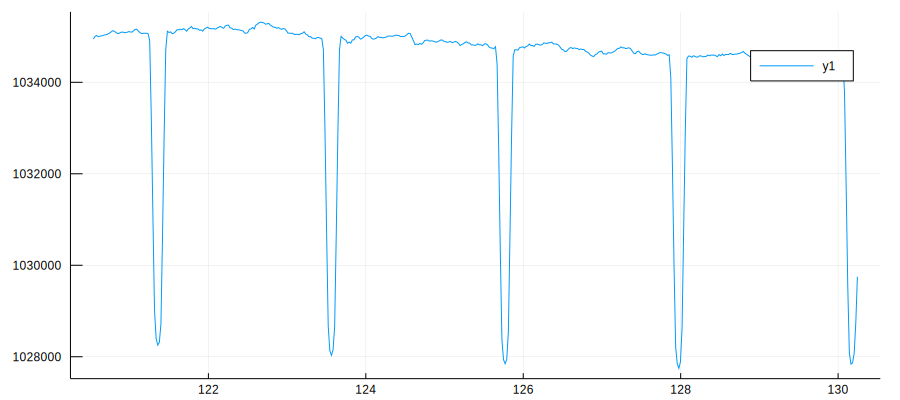

In [9]:
plot(b, a)

In [10]:
findall(a .< 1030000)

28-element Array{Int64,1}:
  39
  40
  41
  42
  43
 147
 148
 149
 150
 151
 255
 256
 257
   ⋮
 363
 364
 365
 366
 367
 470
 471
 472
 473
 474
 475
 476